# ЧАСТЬ 1

## Описание работы: 

*Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.*

*В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании. Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL.*

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
import psycopg2
import matplotlib.pyplot as plt

In [2]:
conn='STRING WITH OPTIONS CONNECT'
engine=sqlalchemy.create_engine(conn)
connect=engine.connect()

In [3]:
hr_dataset=pd.read_sql('SELECT * FROM hr_dataset',connect)
production_staff=pd.read_sql('SELECT * FROM production_staff',connect)
recruiting_costs=pd.read_sql('SELECT * FROM recruiting_costs',connect)
salary_grid=pd.read_sql('SELECT * FROM salary_grid',connect)
def parsing_age(age):
    if age<20:
        return 'Младше 20 лет'
    elif 19<age<30:
        return '20-29 лет'
    elif 29<age<40:
        return '30-39 лет'
    elif 39<age<50:
        return '40-49 лет'
    elif 49<age<60:
        return '50-59 лет'
    elif 59<age<70:
        return '60-69 лет'
    else:
        return 'Старше 70 лет'
    
    

**Первая гипотеза: Отдел с наибольшим средним временем работы сотрудника показывает наилучший результат производительности для компании**

In [4]:
fisrt_hypothesis=pd.read_sql('SELECT department, AVG("Days Employed") as AVG_days_employeed ,AVG(perf_scoreid) as avg_perf_score_for_the_person  FROM hr_dataset group by department order by department',connect)
fisrt_hypothesis

,department,avg_days_employeed,avg_perf_score_for_the_person
0,Admin Offices,1420.700000,3.900000
1,Executive Office,1973.000000,3.000000
2,IT/IS,981.800000,3.780000
3,Production,1308.024038,3.490385
4,Sales,1621.548387,2.870968
5,Software Engineering,1417.800000,2.600000


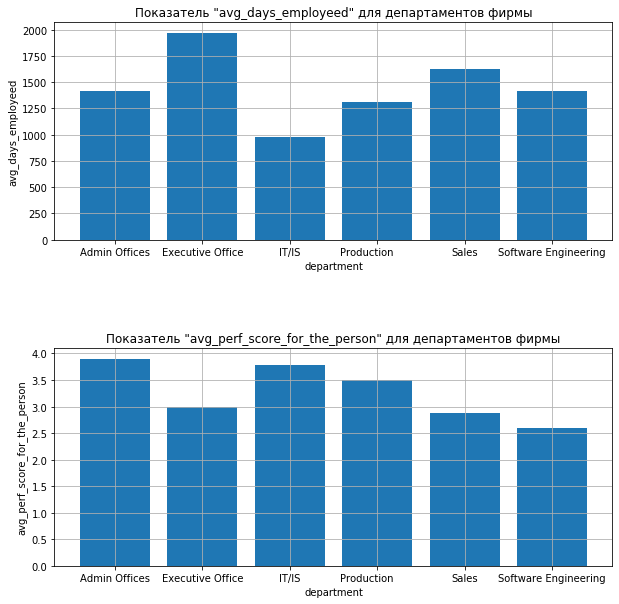

In [5]:
fig,axes=plt.subplots(2,1,figsize=(10,10))
for row in range(0,2):
    axes[row].bar(fisrt_hypothesis['department'],fisrt_hypothesis.iloc[:,1+row])
    axes[row].set_title(f'Показатель "{fisrt_hypothesis.columns[row+1]}" для департаментов фирмы')
    axes[row].set_xlabel('department')
    axes[row].set_ylabel(fisrt_hypothesis.columns[row+1])
    axes[row].grid()
plt.subplots_adjust(wspace=30, hspace=0.5)

*Вывод: Гипотеза не подтвердилась - отдел Executive Office, имея наибольший показатель средней продолжительности работы сотрудника,  показывает 3 из 6 результат по среднему показателю полезности сотрудника, а отдел IT/IS хоть и занимает второе с конца место по средней продолжительности времени работы сотрудника,но показывает второе место  эффективности в нашей метрике.*
    * Стоит обратить внимание на  большую в рамках компании текучку кадров у IT/IS,а также на достаточно низкий средний балл эффективности каждого сотрудника у Software Engineering

**Вторая гипотеза: Способы с не самыми высокими тратами на привлечение сотрудников дают  лучший результат**

In [6]:
second_hypothesis=pd.read_sql('SELECT "Employment Source",avg("Total") as Total_spent, count("Employee Number") as count_of_employees,avg("Total")/count("Employee Number") as Spending_per_person from hr_dataset join recruiting_costs on hr_dataset."Employee Source"=recruiting_costs."Employment Source" group by "Employment Source"  ',connect)
second_hypothesis

,Employment Source,total_spent,count_of_employees,spending_per_person
0,Billboard,6192.0,16,387.000000
1,Pay Per Click,1323.0,1,1323.000000
2,Other,3995.0,9,443.888889
3,Social Networks - Facebook Twitter etc,5573.0,11,506.636364
4,Search Engine - Google Bing Yahoo,5183.0,25,207.320000
5,Professional Society,1200.0,20,60.000000
6,Pay Per Click - Google,3509.0,21,167.095238
7,Word of Mouth,0.0,13,0.000000
8,Glassdoor,0.0,14,0.000000
9,Vendor Referral,0.0,15,0.000000


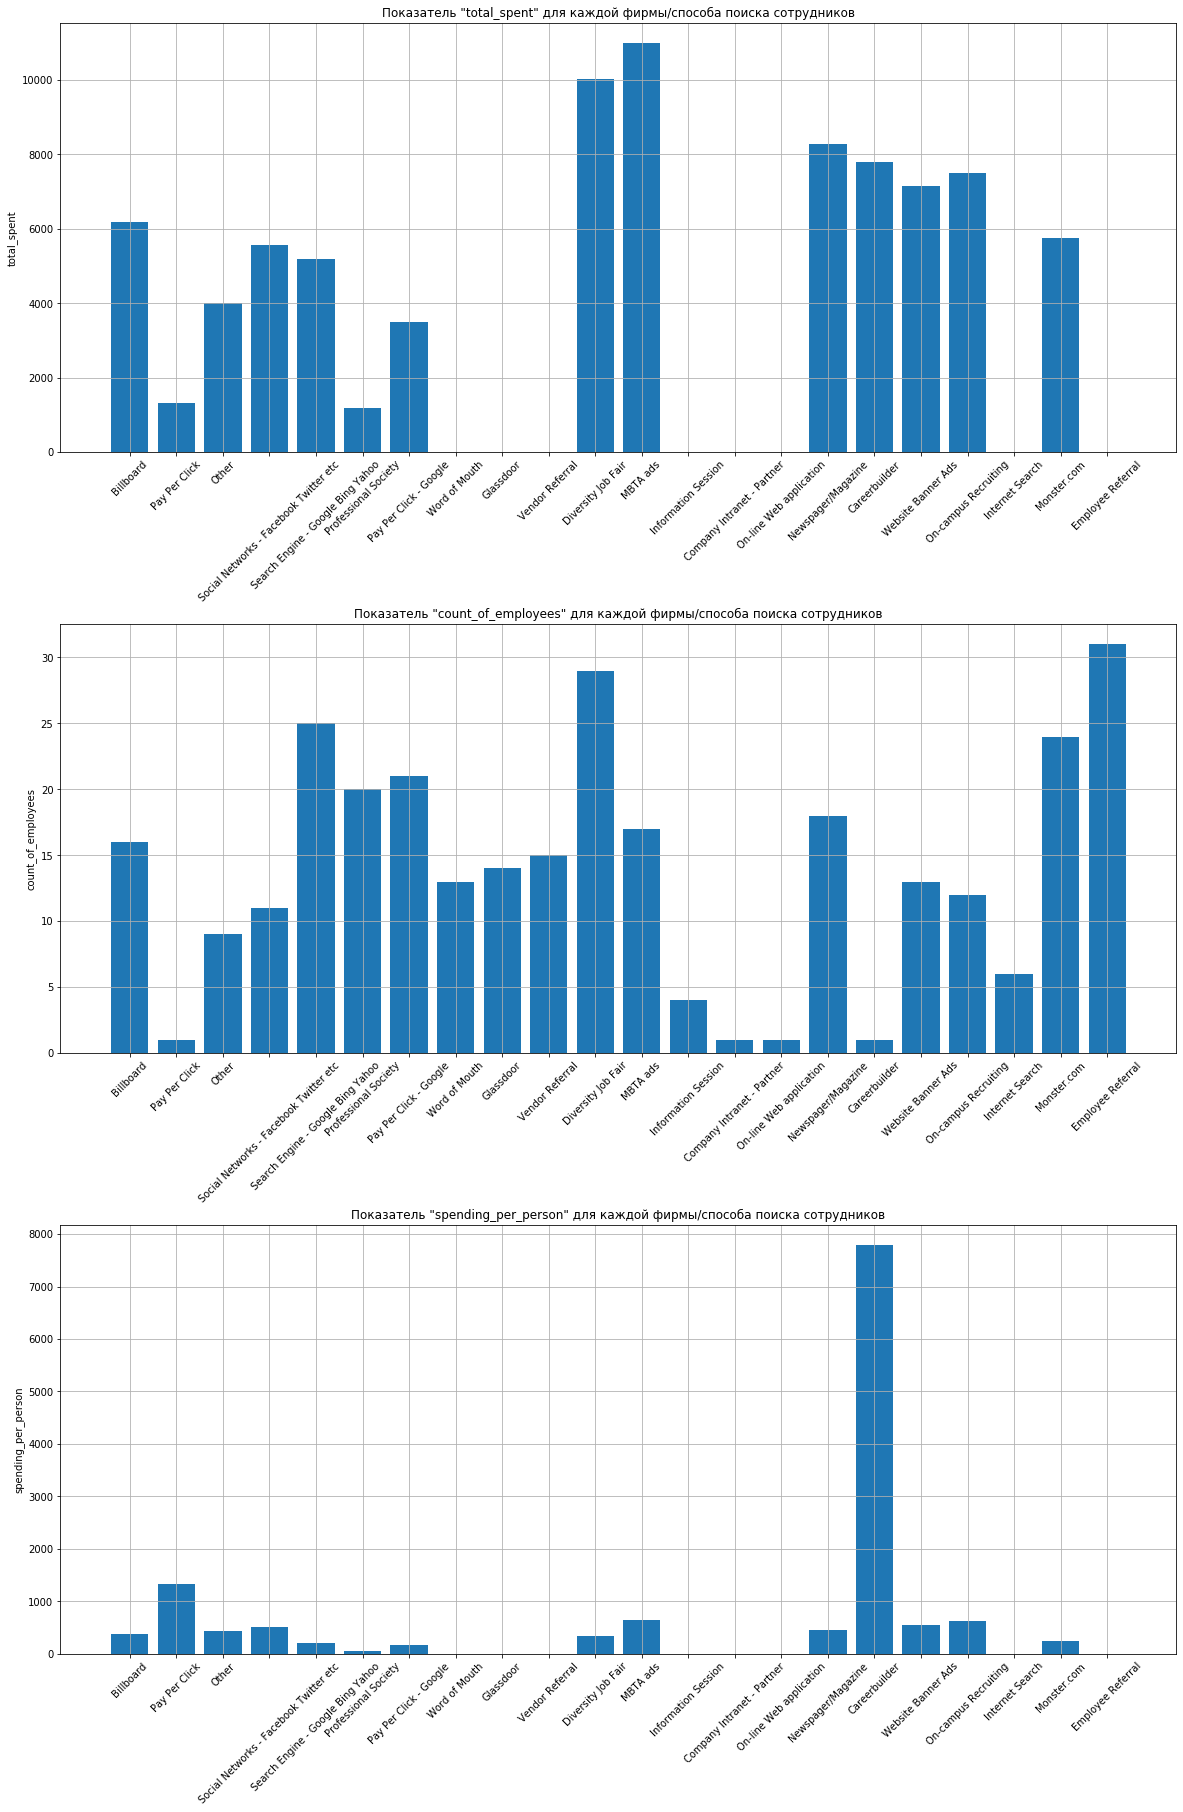

In [7]:
fig,axes=plt.subplots(3,1,figsize=(20,30))
for row in range(0,3):
    axes[row].bar(second_hypothesis['Employment Source'],second_hypothesis.iloc[:,1+row])
    axes[row].set_title(f'Показатель "{second_hypothesis.columns[row+1]}" для каждой фирмы/способа поиска сотрудников')
    axes[row].set_ylabel(second_hypothesis.columns[row+1])
    axes[row].grid()
for axes in axes.flatten():
    for label in axes.get_xticklabels():
        label.set_rotation(45)
plt.subplots_adjust(wspace=20, hspace=0.4)

**Вывод: Гипотеза подтвердилась - методы, на которые тратятся наибольшие средства, не первые  ни по показателю количества привличенных сотрдуников, ни по затратам на одного привлеченного сотрудника.**
    * Стоит уменьшить траты на неэффективные методы поиска сотрудников, а именно на:
        1. Careerbuilder
        2. Pay Per Click
        3. MBTA ads
        4. On-campus Recruiting
        5. Social Networks - Facebook Twitter etc
    

**Третья гипотеза: Пожилые сотрудники имеют более низкий балл эффективности работы**

In [8]:
third_hypothesis=pd.read_sql('SELECT age, avg(perf_scoreid) as avg_score from hr_dataset  group by age order by  avg_score desc',connect)
third_hypothesis['age']=third_hypothesis['age'].apply(parsing_age)
third_hypothesis=third_hypothesis.groupby('age').agg('median')
third_hypothesis

,avg_score
age,
20-29 лет,4.000000
30-39 лет,3.500000
40-49 лет,3.270833
50-59 лет,3.200000
60-69 лет,3.000000


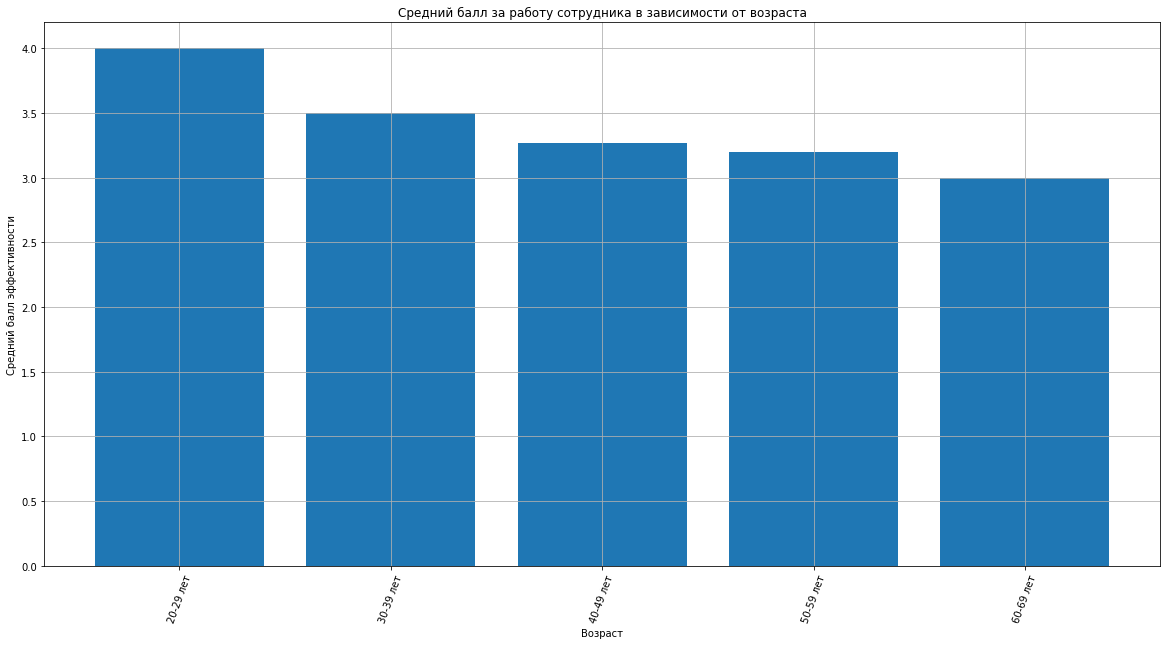

In [9]:
fig, ax = plt.subplots()
ax.bar(third_hypothesis.index,third_hypothesis['avg_score'])
ax.set_title(f'Средний балл за работу сотрудника в зависимости от возраста')
ax.set_xlabel('Возраст')
ax.set_ylabel('Средний балл эффективности')
ax.grid()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.xticks(rotation=70)
plt.show()

**Вывод: Гипотеза  подтвердилась - сотрудники, возраст  которых составляет 20-29 лет показывают наилучший балл эффективности работы, а сотрудники с возрастом от 60 до 69 лет - наименьший, видна прямая зависимость уменьшения эффективности от увеличения возраста**
    * Стоит более внимательно отбирать сотрудников пожилого возраста на должности,связанные с большим количеством задач, быстрым темпом работы и т.п.


**Четвёртая гипотеза: Пожилые сотрудники допускают больше ошибок**

In [10]:
fourth_hypothesis=pd.read_sql('SELECT age, avg("Daily Error Rate") as avg_error from hr_dataset join production_staff using ("Employee Name") group by age order by  avg_error',connect)
fourth_hypothesis['age']=fourth_hypothesis['age'].apply(parsing_age)
fourth_hypothesis=fourth_hypothesis.groupby('age').agg('median')
fourth_hypothesis

,avg_error
age,
20-29 лет,1.000000
30-39 лет,0.900000
40-49 лет,0.666667
50-59 лет,1.000000
60-69 лет,1.000000


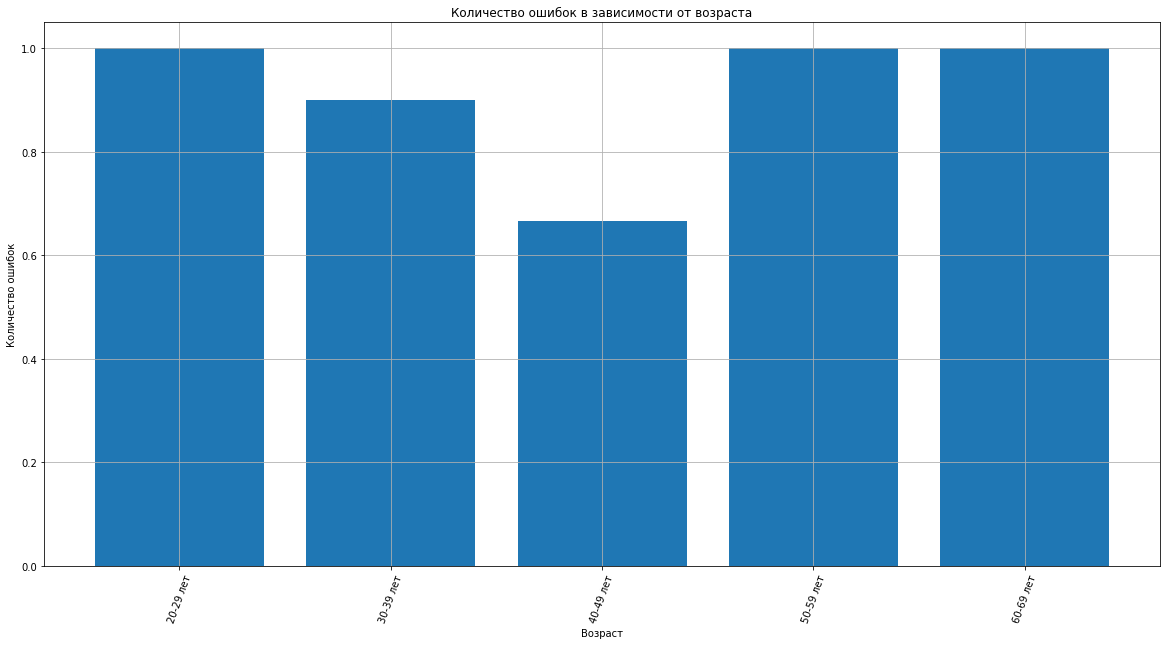

In [11]:
fig, ax = plt.subplots()
ax.bar(fourth_hypothesis.index,fourth_hypothesis['avg_error'])
ax.set_title(f'Количество ошибок в зависимости от возраста')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество ошибок')
ax.grid()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.xticks(rotation=70)
plt.show()

**Вывод: Гипотеза частично подтвердилась - сотрудники, у которых возраст более 60 лет в целом допускают наибольшее количество ошибок в день, но также стоит отметить большое количество ошибок среди сотрудников возраста 20-29 лет, которые могут быть связаны с неопытностью**
    * Стоит более внимательно отбирать сотрудников пожилого возраста на должности, на которых необоходимо принимать ответственные решения 
    * Стоит также уделять  повышенное внимание сотрудникам в возрасте 20-29 лет, т.к. они также достаточно часто допускают ошибки в работе

**Пятая гипотеза: Оба пола имеют одинаковую эффективность работы**

In [12]:
fifth_hypothesis=pd.read_sql('SELECT genderid , avg(perf_scoreid) as avg_score from hr_dataset group by genderid',connect)
fifth_hypothesis

,genderid,avg_score
0,0,3.621469
1,1,3.240602


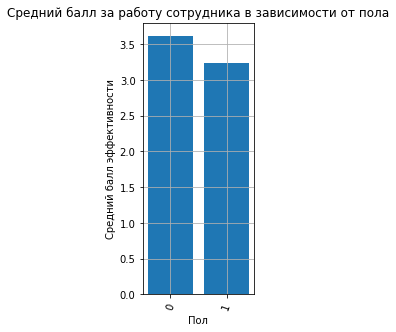

In [13]:
fig, ax = plt.subplots()
ax.bar(fifth_hypothesis['genderid'],fifth_hypothesis['avg_score'])
ax.set_title(f'Средний балл за работу сотрудника в зависимости от пола')
ax.set_xlabel('Пол')
ax.set_ylabel('Средний балл эффективности')
ax.grid()
fig.set_figwidth(2)
fig.set_figheight(5)
plt.xticks(rotation=70)
plt.show()

**Вывод: Гипотеза  не подтвердилась - разница между показателями эффективности работы для полов в среднем различаются только на 11 %**
    * При рассмотрении кандидата на должность пол не должен играть роли

**Шестая гипотеза: Средние показатели эффективности сотрудников могут сильно различаться в зависимости от руководителя**

In [14]:
sixth_hypothesis=pd.read_sql('SELECT "Manager Name", avg(perf_scoreid) as avg_score from hr_dataset group by "Manager Name" order by avg_score',connect)
sixth_hypothesis

,Manager Name,avg_score
0,Alex Sweetwater,2.555556
1,John Smith,2.571429
2,Debra Houlihan,2.666667
3,Brannon Miller,2.857143
4,Kissy Sullivan,2.863636
5,Brian Champaigne,3.000000
6,Board of Directors,3.000000
7,Kelley Spirea,3.000000
8,Janet King,3.157895
9,Lynn Daneault,3.230769


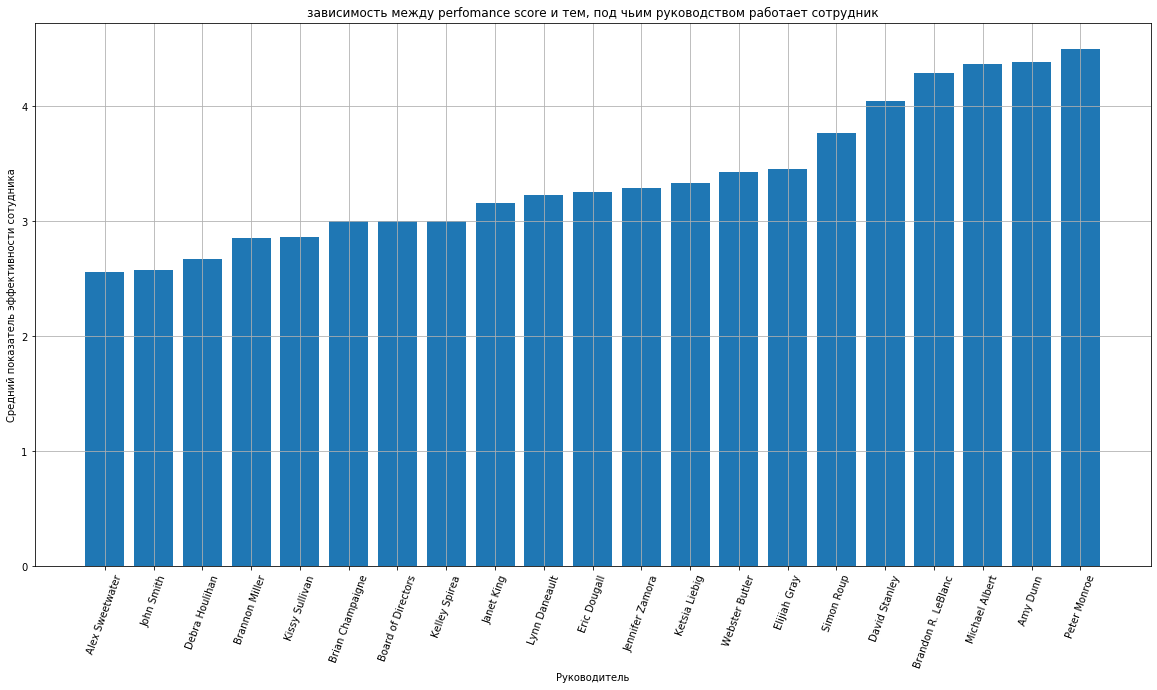

In [15]:
fig, ax = plt.subplots()
ax.bar(sixth_hypothesis['Manager Name'],sixth_hypothesis['avg_score'])
ax.set_title(f'зависимость между perfomance score и тем, под чьим руководством работает сотрудник')
ax.set_xlabel('Руководитель')
ax.set_ylabel('Средний показатель эффективности сотудника')
ax.grid()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.xticks(rotation=70)
plt.show()

**Вывод: Гипотеза  подтвердилась - разница между показателями эффективности работы сотрудников может значительно отличаться в зависимости от руководителя**
    * Стоит провести работу со следующими сотрудниками,чтобы они больше уделяли время своим сотрудникам:
        1. Alex Sweetwater
        2. John Smith
        3. Debra Houlihan
        4. Brannon Miller
        5. Kissy Sullivan

**Седьмая гипотеза: В зависимости от семейного положения среднее время работы сотрудника в компании различается**

In [16]:
seventh_hypothesis=pd.read_sql('SELECT maritalstatusid, avg("Days Employed") as avg_days_employed from hr_dataset group by maritalstatusid order by avg_days_employed',connect)
seventh_hypothesis

,maritalstatusid,avg_days_employed
0,4,863.000000
1,2,1102.866667
2,1,1246.235772
3,0,1372.751825
4,3,1703.416667


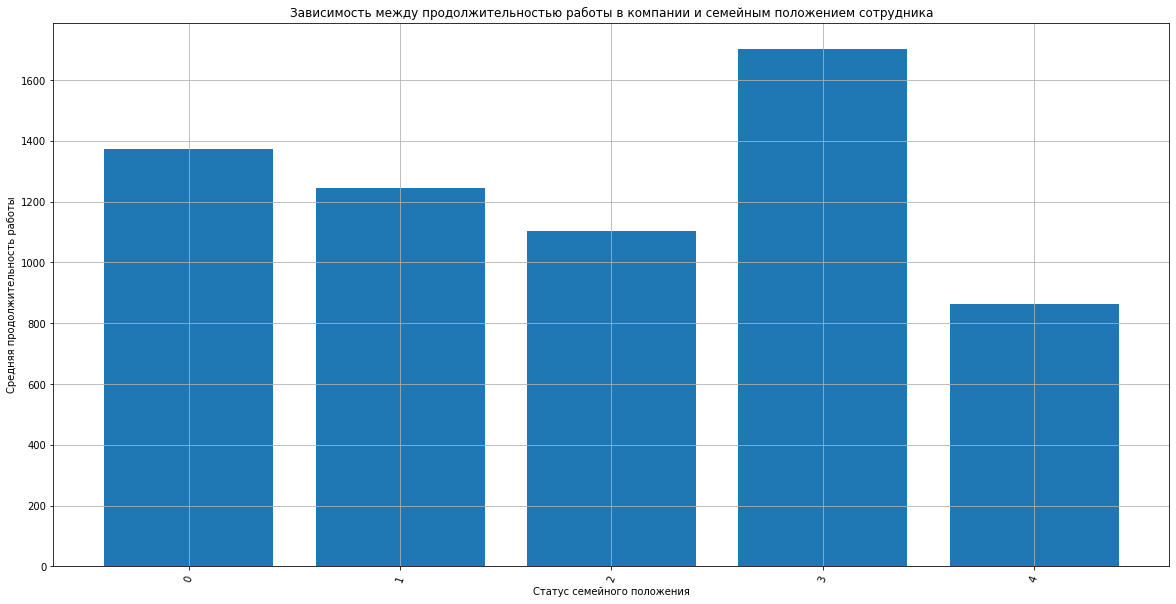

In [17]:
fig, ax = plt.subplots()
ax.bar(seventh_hypothesis['maritalstatusid'],seventh_hypothesis['avg_days_employed'])
ax.set_title(f'Зависимость между продолжительностью работы в компании и семейным положением сотрудника')
ax.set_xlabel('Статус семейного положения')
ax.set_ylabel('Средняя продолжительность работы')
ax.grid()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.xticks(rotation=70)
plt.show()

**Вывод: Гипотеза  подтвердилась - разница между показателями cредней продолжительности работы в компании может  значительно отличаться в зависимости от семейного положения**
    * Возможно, стоит более внимательно рассматривать кандидатов на должность, для которой необходим сотрудник на долгосрочную перспективу, имеющих семейное положение '4'
    * Если у сотрудников есть семейные проблемы, возможны какие-то компенсации на семейного психолога


**Восьмая гипотеза: Есть зависимость между продолжительностью работы в компании и возрастом сотрудника**

In [18]:
eighth_hypothesis=pd.read_sql('SELECT age, avg("Days Employed") as avg_days_employed from hr_dataset  group by age order by  avg_days_employed desc',connect)
eighth_hypothesis['age']=eighth_hypothesis['age'].apply(parsing_age)
eighth_hypothesis=eighth_hypothesis.groupby('age').agg('median')
eighth_hypothesis

,avg_days_employed
age,
20-29 лет,1547.000000
30-39 лет,1218.770769
40-49 лет,1274.050000
50-59 лет,1420.000000
60-69 лет,927.500000


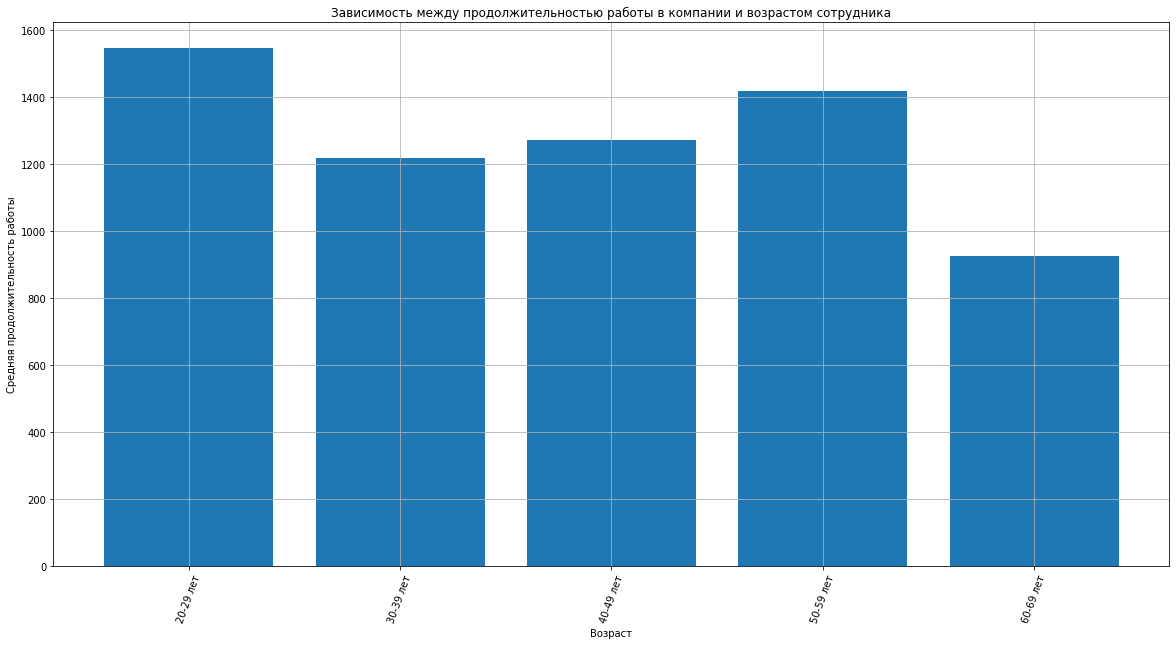

In [19]:
fig, ax = plt.subplots()
ax.bar(eighth_hypothesis.index,eighth_hypothesis['avg_days_employed'])
ax.set_title(f'Зависимость между продолжительностью работы в компании и возрастом сотрудника')
ax.set_xlabel('Возраст')
ax.set_ylabel('Средняя продолжительность работы')
ax.grid()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.xticks(rotation=70)
plt.show()

**Вывод: Гипотеза  не подтвердилась - нет какой-либо устойчивой зависимости средней продолжительности работы в фирме от возраста**

# ЧАСТЬ 2

## Описание работы:
*Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox.
Объектом анализа является паблик Skillbox Вконтакте*

In [20]:
#-*- coding: utf-8 -*-
import requests
import csv
import re
import time
import datetime
import pandas as pd


def get_1000_posts():
    '''
    DOCSTRING: Данная функция делает запрос с использование API VK через модуль requests и сохраняет первые 1000 постов 
    в переменную all_posts
    '''
    offset = 0
    count = 100
    all_posts = []
    key = 'STRING WITH MY OWN KEY'
    domain = 'skillbox_education'
    v = 5.122
    while offset < 1000:
        response = requests.get('https://api.vk.com/method/wall.get',
                                params={'access_token': key, 'v': v, 'domain': domain, 'count': count,
                                        'offset': offset}).json()
        data = response['response']['items']
        all_posts.extend(data)
        offset += 100
    return all_posts




In [21]:
def parsing(posts):
    '''
    DOSCTRING: Данная функция парсит данные, полученные из функции get_1000_posts. 
    В зависимости от часа,когда был сделан пост - присваивает время суток, из текста поста выделяет использованные хештеги,
    считает Индекс Вовлеченности (ER) = ((кол-во лайков + кол-во репостов + кол-во комментариев)/кол-во просмотров) * 100 %,
    сохраняет полученные данные в csv файл
    '''
    with open('parced_posts.csv', 'w',newline='') as f:
        csv_file = csv.writer(f)
        csv_file.writerow(('Время публикации', 'Тематика поста', 'ER'))
        for i in posts:
            try:
                text=i['text']
                text=' '.join(text.split())
                pattern =re.compile('(\#+[\S]+[\_|\@][\S]+)')
                text=pattern.findall(text)[0]
                date=time.ctime(int(i['date']))
                format = '%a %b %d %H:%M:%S %Y'
                date=datetime.datetime.strptime(date,format).hour
                if 6<date<=12:
                    date='Утро'
                elif 12<date<=18:
                    date='День'
                elif 18<date<=24:
                    date='Вечер'
                elif 0<=date<=6:
                    date='Ночь'
                ER=sum([i['likes']['count'], i['comments']['count'], i['reposts']['count']])*100/i['views']['count']
                csv_file.writerow((date, text, ER))
            except:
                pass

            

*Запускаем выполнение написанных функций*

In [22]:
one_thousand_posts = get_1000_posts()
parsing(one_thousand_posts)

*Чтение данных из записанного csv файла*

In [23]:
df=pd.read_csv('parced_posts.csv',delimiter=',',encoding='windows-1251')

*Средний показатель ER в зависимости от времени суток*

In [24]:
print(df.groupby('Время публикации').agg('median'))

                        ER
Время публикации          
Вечер             0.500591
День              0.462732
Утро              0.556309


*Средний показатель количества публикаций в зависимости от времени суток*

In [25]:
print(df.groupby('Время публикации').agg('count').iloc[:,0])

Время публикации
Вечер    157
День     478
Утро     276
Name: Тематика поста, dtype: int64


*Наиболее частые темы постов*

In [26]:
df1=df.groupby('Тематика поста').agg('count')
df1=df1.sort_values('Время публикации',ascending=False).head(20)
print(df1.iloc[:,0])

Тематика поста
#Статья_Skillbox                   186
#Расписание_Skillbox                61
#Skillbox_дизайн                    52
#В_закладки_Skillbox                51
#read@skillbox_education            34
#Skillbox_маркетинг                 30
#Skillbox_программирование          28
#Полезное_от_Skillbox               27
#Анонс_Skillbox                     23
#Skillbox_вдохновляет               19
#Лекторий_Skillbox                  19
#Вебинар_Skillbox                   17
#Игра_Skillbox_по_управлению        17
#Design_Battle_Skillbox             15
#Skillbox_Дизайн                    14
#Конкурс_Skillbox                   13
#В_Закладки_Skillbox                13
#collections@skillbox_education     12
#Skillbox_управление                12
#Курс_Skillbox                       9
Name: Время публикации, dtype: int64


*Наиболее редкие темы постов*

In [27]:
df2=df.groupby('Тематика поста').agg('count')
df2=df2.sort_values('Время публикации',ascending=True).head(20)
print(df2.iloc[:,0])

Тематика поста
#AIC_Skillbox                             1
#skillbox_дизайн                          1
#skillbox_sreda                           1
#Новости_Skillbox                         1
#Плакаты_Skillbox                         1
#Полезное_от_Скиллбокс                    1
#Правки_Skillbox                          1
#Преподы_Skillbox                         1
#Программа_лояльности_Skillbox            1
#Проще_говоря_Skillbox                    1
#Разбор_в_Skillbox                        1
#Разбор_кейса_Skillbox#Skillbox_дизайн    1
#Скидки_Skillbox                          1
#Сленг_программиста_Sillbox               1
#Skillbox_курс                            1
#Советпрепода_Skillbox                    1
#skillbox_маркетинг                       1
#Гороскоп_Skillbox                        1
#skillbox_тренды                          1
#Моушен_Skillbox                          1
Name: Время публикации, dtype: int64


*Темы постов с наибольшей активностью*

In [28]:
print(df[df['ER']>1].groupby('Тематика поста').agg('median').sort_values('ER',ascending=False))

                                           ER
Тематика поста                               
#Конкурс_Skillbox                    1.809169
#Взакладки_Skillbox                  1.730476
#Cовет_препода_Skillbox              1.654348
#Альпина_Skillbox                    1.583387
#Айдентик_Skillbox                   1.547734
#friday_typeface@skillbox_education  1.443258
#Skillbox_маркетинг                  1.351234
#Уроки_Skillbox                      1.338588
#Полезное_от_Skillbox                1.280076
#collections@skillbox_education      1.218652
#Вебинар_Skillbox                    1.201498
#marketing@skillbox_education        1.187500
#Полезное_от_Скиллбокс               1.180299
#Skillbox_Дизайн                     1.178342
#Skillbox_дизайн                     1.148964
#В_закладки_Skillbox                 1.144565
#Иллюстрация_Skillbox                1.127278
#Skillbox_управление                 1.126548
#read@skillbox_education             1.107848
#Статья_Skillbox                  

*Темы постов с наименьшей активностью*

In [29]:
print(df[df['ER']<0.2].groupby('Тематика поста').agg('median').sort_values('ER',ascending=True))

                                        ER
Тематика поста                            
#Интенсив_Skillbox                0.037980
#Skillbox_Sreda                   0.085522
#Skillbox_Pinkman                 0.097209
#skillbox_маркетинг               0.115366
#Анонс_Skillbox                   0.128112
#Skillbox_Дизайн                  0.132180
#Черная_пятница_Skillbox          0.143616
#OFFF_Moscow                      0.144101
#Конкурс_Skillbox                 0.144980
#Skillbox_программирование        0.151125
#Skillbox_кейс                    0.151595
#в_закладки_skillbox              0.160982
#Проще_говоря_Skillbox            0.162694
#Вам_слово_Skillbox               0.163411
#skillbox_sreda                   0.175307
#В_закладки_Skillbox              0.176554
#Лекторий_Skillbox                0.176611
#Расписание_Skillbox              0.176913
#Dominos_Skillbox                 0.176975
#Mail_Design_Cup                  0.183416
#Игра_Skillbox_по_управлению      0.184422
#Skillbox_м

##  Выводы:
1. Наиучшим временем для публикаций является утро
2. Наибольшее же количество публикаций появляются в группе днём. Следовательно, необоходимо произвести изменение графика публикаций и публиковать больше записей утром и вечером, а не днём
3. Выявлен список наиболее частых и редких постов, считаю необходимым не использовать в дальнейшем непопулярные хештеги для унификации контента группы (Айдентик_Skillbox,skillbox_тренды,Skillbox_кейс и т.д.)
4. Выделены наиболее популярные и непопулярные темы постов среди пользователей - необходимо либо отказаться от непопулярных тем, либо произвести пересмотр контента в постах данных тематик. Посты, содержащие наиболее популярные темы среди пользователей следует публиковать чаще